<a href="https://colab.research.google.com/github/acedesci/scanalytics/blob/master/S7_SimpleDemo_Telco-SCMP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Introduction to ML - Classification (Customer Churn)**

## Simple demo based on Classification on Customer Churn Dataset

Classification using customer service churn dataset (https://www.kaggle.com/blastchar/telco-customer-churn). This dataset has been preprocessed to create dummy variables. We will only use part of the variables and datapoints in this example. For the full-scale run, please see Demo 3.

In this first step, we will load sklearn library, which is a common library used in machine learning. Please see: https://scikit-learn.org/stable/getting_started.html for reference. The code "sklearn.__version__" simply shows the version of sklearn we are using.

In [0]:
import sklearn
from sklearn import *
sklearn.__version__

'0.22.2.post1'

### **Block 1**: data input

First, we will load the data input which is in the csv format. This data input is available on the URL indicated in the codes (there is no need to download it to your machine but you can follow the link to download it if you want to). We will print out the first 5 rows to review. 

In this dataset, the first column is the ID of the customer whereas the subsequent columns, except the last one, describe the input data which are associated with each customer (e.g., for the first customer, he is not a *SeniorCitizen*, has a *tenure* of 1 month, and his *MonthlyCharges* is $29.85, etc.). The last column is the label indicating if his customer has not churned (*Churn_Yes* = 0).

In [0]:
import pandas as pd
import numpy as np
# Load transformed dataset
url = 'https://raw.githubusercontent.com/acedesci/scanalytics/master/S7_intro_ML/data/Telco-Customer-Churn_dummies.csv'
customer_data = pd.read_csv(url)
customer_data.head(5)

,ID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,1,0,34,56.95,1889.50,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,2,0,2,53.85,108.15,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1
3,3,0,45,42.30,1840.75,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0
4,4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1


For simplicity, we will cut only the first 20 customer IDs for our demo. This is only for the sake of presentation and you should run the analysis in the full dataset in practice.

In [0]:
# skip this block if you want to run it on the entire dataset
customer_data = customer_data.loc[:19]
customer_data

,ID,SeniorCitizen,tenure,MonthlyCharges,TotalCharges,gender_Male,Partner_Yes,Dependents_Yes,PhoneService_Yes,MultipleLines_Yes,InternetService_Fiber optic,InternetService_No,OnlineSecurity_Yes,OnlineBackup_Yes,DeviceProtection_Yes,TechSupport_Yes,StreamingTV_Yes,StreamingMovies_Yes,Contract_One year,Contract_Two year,PaperlessBilling_Yes,PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check,Churn_Yes
0,0,0,1,29.85,29.85,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0
1,1,0,34,56.95,1889.50,1,0,0,1,0,0,0,1,0,1,0,0,0,1,0,0,0,0,1,0
2,2,0,2,53.85,108.15,1,0,0,1,0,0,0,1,1,0,0,0,0,0,0,1,0,0,1,1
3,3,0,45,42.30,1840.75,1,0,0,0,0,0,0,1,0,1,1,0,0,1,0,0,0,0,0,0
4,4,0,2,70.70,151.65,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,1,0,1
5,5,0,8,99.65,820.50,0,0,0,1,1,1,0,0,0,1,0,1,1,0,0,1,0,1,0,1
6,6,0,22,89.10,1949.40,1,0,1,1,1,1,0,0,1,0,0,1,0,0,0,1,1,0,0,0
7,7,0,10,29.75,301.90,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,0
8,8,0,28,104.80,3046.05,0,1,0,1,1,1,0,0,0,1,1,1,1,0,0,1,0,1,0,1
9,9,0,62,56.15,3487.95,1,0,1,1,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0,0


### **Block 2**: Feature preparation

This block is supposed to be for feature engineering. Since all the features are already prepared and are in numerical format, we will not do the feature engineering/transformation here. We will only take 4 input variables to be used in our model in this case (see "selected_features" below).

The input variables are then assigned to *X* and the predicted value (column 'Churn_Yes') is then assigned to *y*.

In [0]:
selected_features = ['tenure', 'TotalCharges', 'InternetService_Fiber optic', 'gender_Male']
# selected_features = customer_data.columns[1:-1].values # use this one if you want all the features

X = customer_data[selected_features]
y = customer_data['Churn_Yes']

# show the input features (X)
X

,tenure,TotalCharges,InternetService_Fiber optic,gender_Male
0,1,29.85,0,0
1,34,1889.50,0,1
2,2,108.15,0,1
3,45,1840.75,0,1
4,2,151.65,1,0
5,8,820.50,1,0
6,22,1949.40,1,1
7,10,301.90,0,0
8,28,3046.05,1,0
9,62,3487.95,0,1


In [0]:
# show the labels (y)
y

0     0
1     0
2     1
3     0
4     1
5     1
6     0
7     0
8     1
9     0
10    0
11    0
12    0
13    1
14    0
15    0
16    0
17    0
18    1
19    0
Name: Churn_Yes, dtype: int64

You can see from the above results that the first data point corresponds to the first customer (ID 0), and the second one corresponds to the second customer and so on. The first predicted value is the 'label' which corresponds to the first data point and indicates that the first customer did not churn (y = 0). There are 20 data points in total (since we take only the first 20 data points).

### Splitting data for training and testing process ###

Since we want to measure the performance of the model for prediction task, we must perform a cross-validation process in order to evaluate how the model performs on the data it has not seen in the training (or model parameter fitting) process. This will allow us to see how the model would perform once we use it in prediction which predicts the results based on the new data points where the labels (prediced values) are still not available.

The codes below will randomly split the data into 75% for training and 25% in testing. We also print out the split data to review which data points below to the training set, and which data points belong to the testing set.

In order to do this, we use sklearn function *model_selection.train_test_split(X, y)* (see https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html) which takes the input data X and label y. Since this function will split the data points randomly, we also indicate "random_state=0" so that we can reproduce the same result (in practice, this would not be necessary).

In [0]:
# Split into training and testing data (75/25 by default)
X_train, X_test, y_train, y_test = sklearn.model_selection.train_test_split(X, y, random_state=2)


In [0]:
# Here is the training set:
print("Number of data points in training set: "+str(len(y_train)))

# show the train data
X_train

Number of data points in training set: 15


,tenure,TotalCharges,InternetService_Fiber optic,gender_Male
5,8,820.50,1,0
3,45,1840.75,0,1
10,13,587.45,0,1
1,34,1889.50,0,1
17,71,7382.25,1,1
7,10,301.90,0,0
16,52,1022.95,0,0
14,25,2686.05,1,1
2,2,108.15,0,1
11,16,326.80,0,1


In [0]:
# Here is the testing set:
print("Number of data points in testing set: "+str(len(y_test)))

# show the test data
X_test

Number of data points in testing set: 5


,tenure,TotalCharges,InternetService_Fiber optic,gender_Male
12,58,5681.10,1,1
4,2,151.65,1,0
18,10,528.35,0,0
0,1,29.85,0,0
9,62,3487.95,0,1


### **Block 3**: Model

In this block, we will choose the models to be used for prediction. Only the training set will be used in this step (and the testing set will be used in cross-validation). We will consider two models, i.e., logistic regression and decision tree.

### 3.1 Logistic regression model

Here we will prepare the object of the model by calling the function which corresponds to the model we choose. You can simply call the code below *sklearn.linear_model.LogisticRegression()* to create an object of logistic regression which we name as *logreg*

See https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html for more information about this function.

In [0]:
logreg = sklearn.linear_model.LogisticRegression()

### 3.2 Classification tree model

Now we also prepare an object for classification tree using *sklearn.tree.DecisionTreeClassifier* to create an object of the model which we name as *tree*. Note that the algorithm uses a random initialization so we also put *random_state=0* to ensure that we can reproduce the result.

See https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html for more information about this function.

In [0]:
tree = sklearn.tree.DecisionTreeClassifier(random_state=0)

### Running ML algorithm to fit the model

Now we need to fit the models (both logistic regression and classification tree) by using the training dataset. This step can be done by calling the method *model_object.fit(X,y)* on the object of the model we already created. The model will estimate the parameters from the input variables X and label y in the training set (75% of data points).

First we train the logistic regression model using the training set. We also print out the accuracy level from the model for the training set to see how the model performs in this training set (note: this is NOT cross-validation).

The method *model_object.score(X, y)* will take the data input X to perform a prediction (or estimation) and then it will compare the result of the preduction to the known label *y*. You can review the documentation of the model (the links under 3.1 and 3.2) for more information about the methods fit(), score(), and other methods of the model.

In [0]:
# Train Logistic regression
logreg.fit(X_train, y_train)
print("Logistic Regression: Training accuracy: {:.3f}".format(logreg.score(X_train, y_train)))


Logistic Regression: Training accuracy: 0.867



If you want to see the predicted result for each customer (in the training set), you can call the method *predict()* and compare it with the labels to see which customers (again, in the training set) were predicted correctly.

In [0]:
y_predict = logreg.predict(X_train)
correct = ['Yes' if abs(y_predict[i] - y_train.values[i]) <= 1e-3  else 'No' for i in range(0,len(y_train.values))]

# The following codes summarize the outputs
dfResults = X_train.copy()
y_prob = np.round(logreg.predict_proba(X_train)[:,1],2)
dfResults['Churn_Probability'] = y_prob
dfResults['Churn_Predicted'] = y_predict
dfResults['Churn_True'] = y_train.values
dfResults['Correct'] = correct
dfResults

,tenure,TotalCharges,InternetService_Fiber optic,gender_Male,Churn_Probability,Churn_Predicted,Churn_True,Correct
5,8,820.50,1,0,0.74,1,1,Yes
3,45,1840.75,0,1,0.00,0,0,Yes
10,13,587.45,0,1,0.12,0,0,Yes
1,34,1889.50,0,1,0.00,0,0,Yes
17,71,7382.25,1,1,0.04,0,0,Yes
7,10,301.90,0,0,0.14,0,0,Yes
16,52,1022.95,0,0,0.00,0,0,Yes
14,25,2686.05,1,1,0.58,1,0,No
2,2,108.15,0,1,0.77,1,1,Yes
11,16,326.80,0,1,0.01,0,0,Yes


We do the same for classification tree.

In [0]:
# Train classification tree
tree.fit(X_train, y_train)
print("Classification tree: Training accuracy: {:.3f}".format(tree.score(X_train, y_train)))

y_predict = tree.predict(X_train)
correct = ['Yes' if abs(y_predict[i] - y_train.values[i]) <= 1e-3  else 'No' for i in range(0,len(y_train.values))]

# The following codes summarize the outputs
dfResults = X_train.copy()
y_prob = np.round(tree.predict_proba(X_train)[:,1],2)
dfResults['Churn_Probability'] = y_prob
dfResults['Churn_Predicted'] = y_predict
dfResults['Churn_True'] = y_train.values
dfResults['Correct'] = correct
dfResults

Classification tree: Training accuracy: 1.000


,tenure,TotalCharges,InternetService_Fiber optic,gender_Male,Churn_Probability,Churn_Predicted,Churn_True,Correct
5,8,820.50,1,0,1.0,1,1,Yes
3,45,1840.75,0,1,0.0,0,0,Yes
10,13,587.45,0,1,0.0,0,0,Yes
1,34,1889.50,0,1,0.0,0,0,Yes
17,71,7382.25,1,1,0.0,0,0,Yes
7,10,301.90,0,0,0.0,0,0,Yes
16,52,1022.95,0,0,0.0,0,0,Yes
14,25,2686.05,1,1,0.0,0,0,Yes
2,2,108.15,0,1,1.0,1,1,Yes
11,16,326.80,0,1,0.0,0,0,Yes


### **Block 4**: Validation

Now we have trained the two models using the training sets. The cross-validation is the key step to evaluate if the models will still perform well on the data points they haven't seen before. In order to do this, we can simply call the *score()* method but using the test set instead of the training set. 

In [0]:
# Measure the out-of-sample performance of the logistic regression model
y_predict = logreg.predict(X_test)
print("Logistic Regression: Testing accuracy: {:.3f}".format(logreg.score(X_test, y_test)))

correct = ['Yes' if abs(y_predict[i] - y_test.values[i]) <= 1e-3  else 'No' for i in range(0,len(y_test.values))]

dfResults = X_test.copy()
y_prob = np.round(logreg.predict_proba(X_test)[:,1],2)
dfResults['Churn_Probability'] = y_prob
dfResults['Churn_Predicted'] = y_predict
dfResults['Churn_True (unseen)'] = y_test.values
dfResults['Correct'] = correct
dfResults

Logistic Regression: Testing accuracy: 0.600


,tenure,TotalCharges,InternetService_Fiber optic,gender_Male,Churn_Probability,Churn_Predicted,Churn_True (unseen),Correct
12,58,5681.10,1,1,0.03,0,0,Yes
4,2,151.65,1,0,0.79,1,1,Yes
18,10,528.35,0,0,0.28,0,1,No
0,1,29.85,0,0,0.78,1,0,No
9,62,3487.95,0,1,0.00,0,0,Yes



Now we test the classification tree model.

In [0]:
y_predict = tree.predict(X_test)
print("Classification Tree: Testing accuracy: {:.3f}".format(tree.score(X_test, y_test)))
correct = ['Yes' if abs(y_predict[i] - y_test.values[i]) <= 1e-3  else 'No' for i in range(0,len(y_test.values))]

dfResults = X_test.copy()
y_prob = np.round(tree.predict_proba(X_test)[:,1],2)
dfResults['Churn_Probability'] = y_prob
dfResults['Churn_Predicted'] = y_predict
dfResults['Churn_True (unseen)'] = y_test.values
dfResults['Correct'] = correct
dfResults

Classification Tree: Testing accuracy: 0.400


,tenure,TotalCharges,InternetService_Fiber optic,gender_Male,Churn_Probability,Churn_Predicted,Churn_True (unseen),Correct
12,58,5681.10,1,1,1.0,1,0,No
4,2,151.65,1,0,1.0,1,1,Yes
18,10,528.35,0,0,0.0,0,1,No
0,1,29.85,0,0,1.0,1,0,No
9,62,3487.95,0,1,0.0,0,0,Yes


### Getting the insights in the models.

The logistic regression model can provide you the coefficeints of the linear function of the fitted model. You can obtain those attributes from the trained model (object). This is also described in the documentation page of the model. The codes below show how such outputs can be obtained.

In [0]:
# Obtain the coefficients of the logistic regression model
print("intercept"+str(logreg.intercept_))
print("selected features: " + str(selected_features))
print("coefficients:"+str(logreg.coef_))

intercept[1.62669838]
selected features: ['tenure', 'TotalCharges', 'InternetService_Fiber optic', 'gender_Male']
coefficients:[[-0.4549814   0.00370288  0.04097541  0.08745535]]


For the classification tree model, the main output is *feature_importances_* which indicate the relative importance score of each feature used in the model. We can explore feature importance using the codes below.

In [0]:
# print("List of features: "+ str(selected_features))
# print("Feature importance: "+ str(tree.feature_importances_))

dfFeatureImportance = pd.DataFrame(columns=['Feature','Re.Importance'])
dfFeatureImportance['Feature'] = selected_features
dfFeatureImportance['Re.Importance'] = tree.feature_importances_
dfFeatureImportance = dfFeatureImportance.sort_values(by = 'Re.Importance', ascending=False)

dfFeatureImportance.head()

,Feature,Re.Importance
0,tenure,0.763986
1,TotalCharges,0.236014
2,InternetService_Fiber optic,0.000000
3,gender_Male,0.000000


We can also vitualize the classification tree using the codes below (note: the *max_depth* parameter will control the size of the displayed tree. We would not be able to visualize a very big tree so you can change the depth to display only a certain number of layers of the tree).

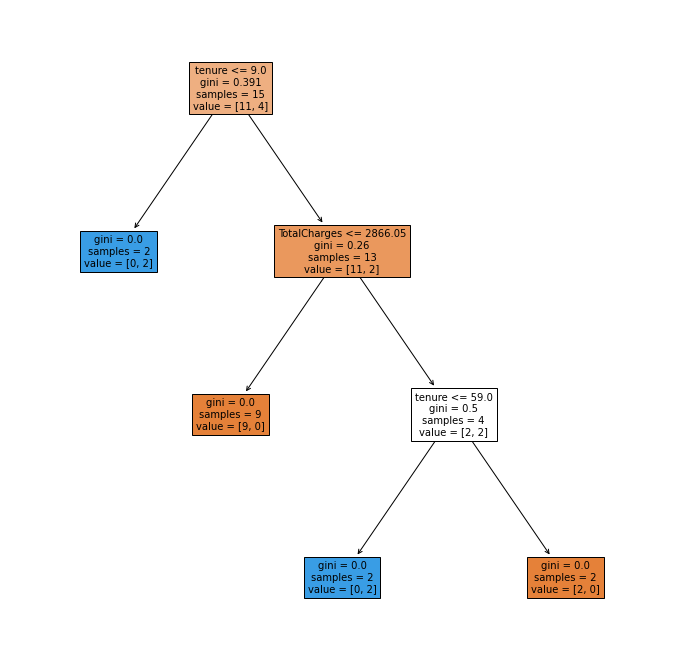

In [0]:
import matplotlib.pyplot as plt
plt.figure(figsize=(12,12))
sklearn.tree.plot_tree(tree, feature_names=selected_features, fontsize=10, filled = True, max_depth=4)
plt.show()